# Regulatory Affairs of Road Accident

Import important libreries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pf = pd.read_csv(r"Road accident data\Regulatory Affairs of Road Accident Data 2020.csv")
pf.columns=pf.columns.str.replace(" ","_")
pf.head()

,Million_Plus_Cities,Cause_category,Cause_Subcategory,Outcome_of_Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [4]:
pf.columns

Index(['Million_Plus_Cities', 'Cause_category', 'Cause_Subcategory',
       'Outcome_of_Incident', 'Count'],
      dtype='object')

In [5]:
pf.shape

(9550, 5)

In [6]:
print(pf.isnull().sum())

Million_Plus_Cities    0
Cause_category         0
Cause_Subcategory      0
Outcome_of_Incident    0
Count                  3
dtype: int64


# Data Cleaning

In [7]:
pf_clean=pf.dropna()
print(pf_clean.isnull().sum())

Million_Plus_Cities    0
Cause_category         0
Cause_Subcategory      0
Outcome_of_Incident    0
Count                  0
dtype: int64


Now there is no missing value after cleaning the data

Exploratory Data Analysis (EDA)

In [8]:
pf_clean["Million_Plus_Cities"].value_counts()

Million_Plus_Cities
Agra                    191
Patna                   191
Kollam                  191
Kota                    191
Lucknow                 191
Ludhiana                191
Madurai                 191
Mallapuram              191
Meerut                  191
Mumbai                  191
Nagpur                  191
Nashik                  191
Pune                    191
Ahmedabad               191
Raipur                  191
Rajkot                  191
Srinagar                191
Surat                   191
Thiruvanthapuram        191
Thrissur                191
Tiruchirapalli          191
Vadodra                 191
Varanasi                191
Vijaywada city          191
Kolkata                 191
Kochi                   191
Khozikode               191
Kanpur                  191
Allahabad(Prayagraj)    191
Amritsar                191
Asansol Durgapur        191
Aurangabad              191
Bengaluru               191
Bhopal                  191
Chandigarh              191


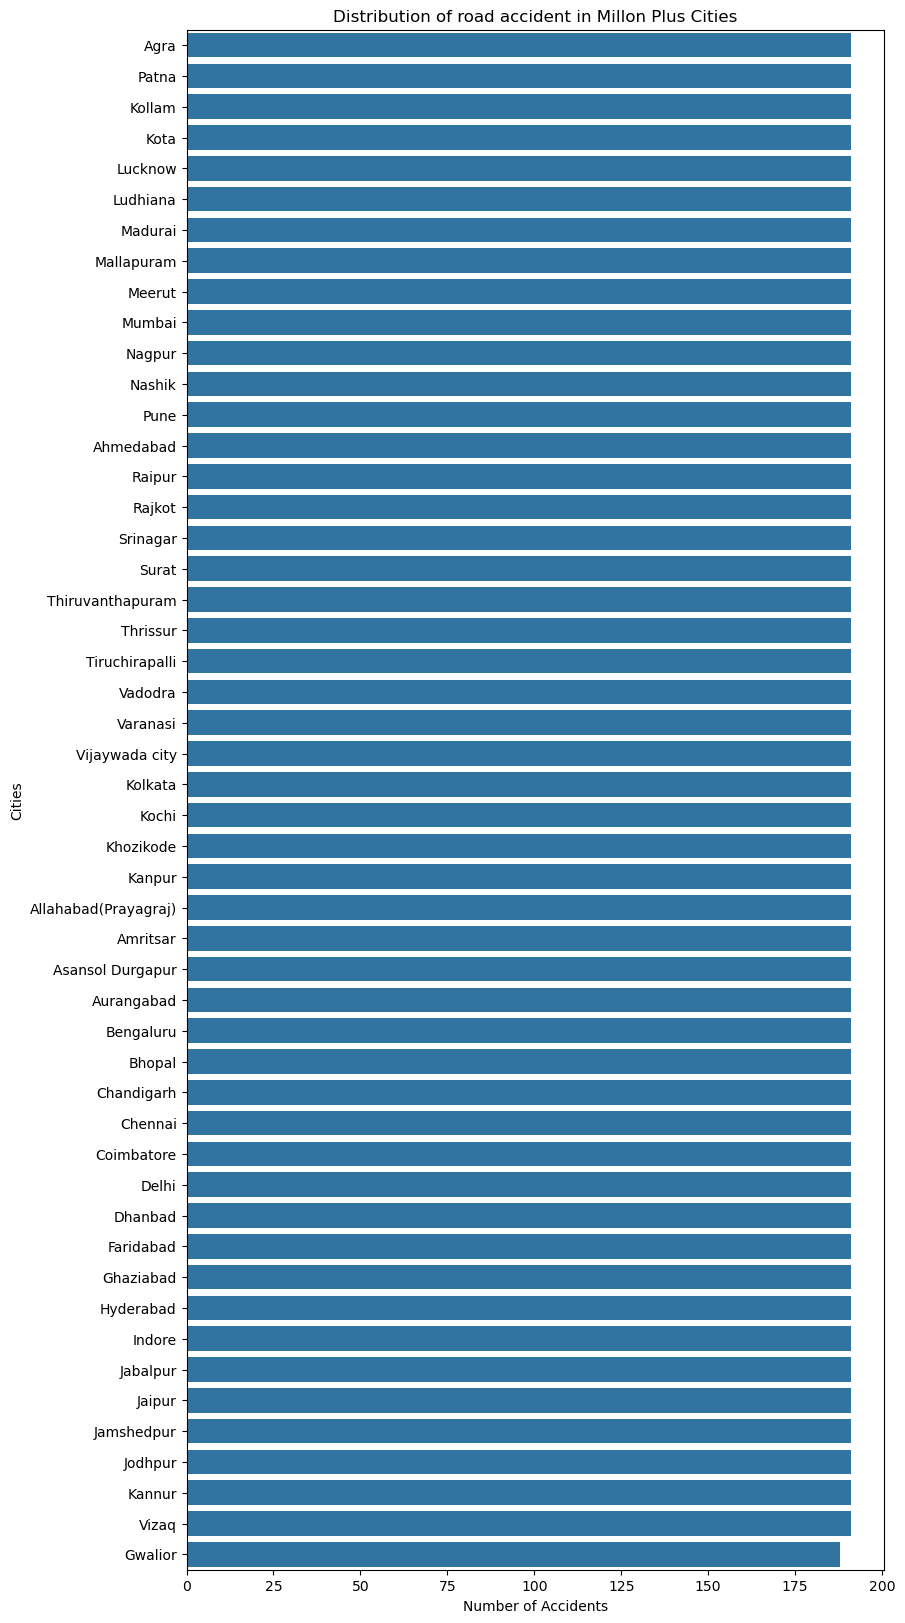

In [9]:
plt.figure(figsize=(9,20))
sns.countplot(y="Million_Plus_Cities",data=pf_clean,order=pf_clean["Million_Plus_Cities"].value_counts().index)
plt.title("Distribution of road accident in Millon Plus Cities")
plt.xlabel("Number of Accidents")
plt.ylabel("Cities")
plt.show()

From this we find out maximum cities  has highest accident records except Gwalior.

Accident causes in the cities

In [10]:
pf_clean["Cause_category"].value_counts()

Cause_category
Road Features               2000
Impacting Vehicle/Object    1797
Traffic Control             1500
Junction                    1500
Traffic Violation           1500
Weather                     1250
Name: count, dtype: int64

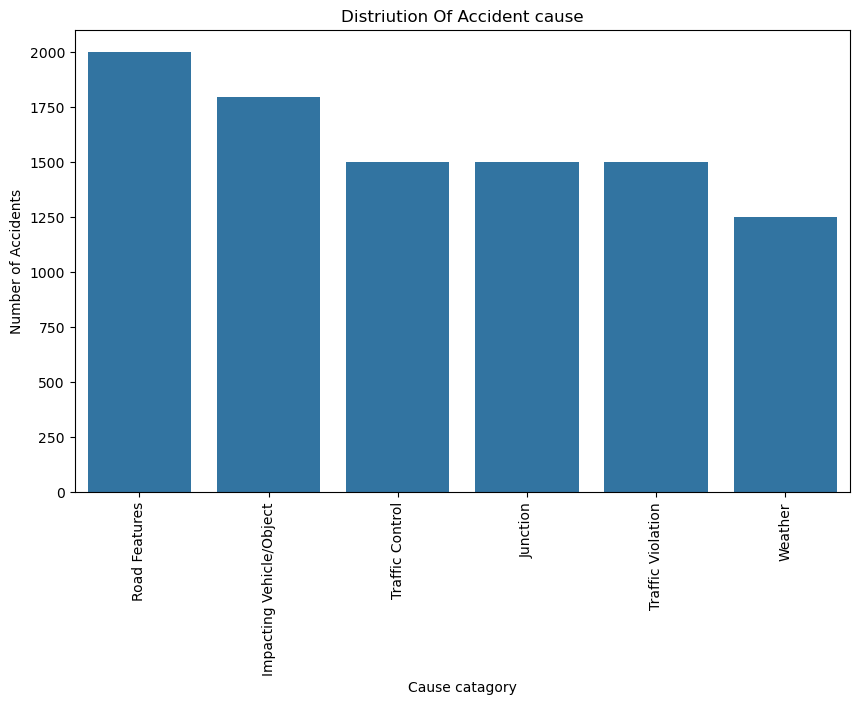

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x="Cause_category",data=pf_clean,order=pf_clean["Cause_category"].value_counts().index)
plt.title("Distriution Of Accident cause")
plt.xlabel("Cause catagory")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=90)
plt.show()


From the above plot ,it showing that due to Read Feature maximum accident accures.

Further detail analysis

In [12]:
pf_clean["Cause_Subcategory"].value_counts()

Cause_Subcategory
Others                                              1450
Flashing Signal/Blinker                              250
Over                                                 250
Rainy                                                250
Hail/Sleet                                           250
Foggy and Misty                                      250
Straight Road                                        250
Steep Grade                                          250
Pot Holes                                            250
Ongoing Road Works/Under Construction                250
Curved Road                                          250
Bridge                                               250
Use of Mobile Phone                                  250
Culvert                                              250
Jumping Red Light                                    250
Four arm Junction                                    250
Police Controlled                                    250
Stop Sign    

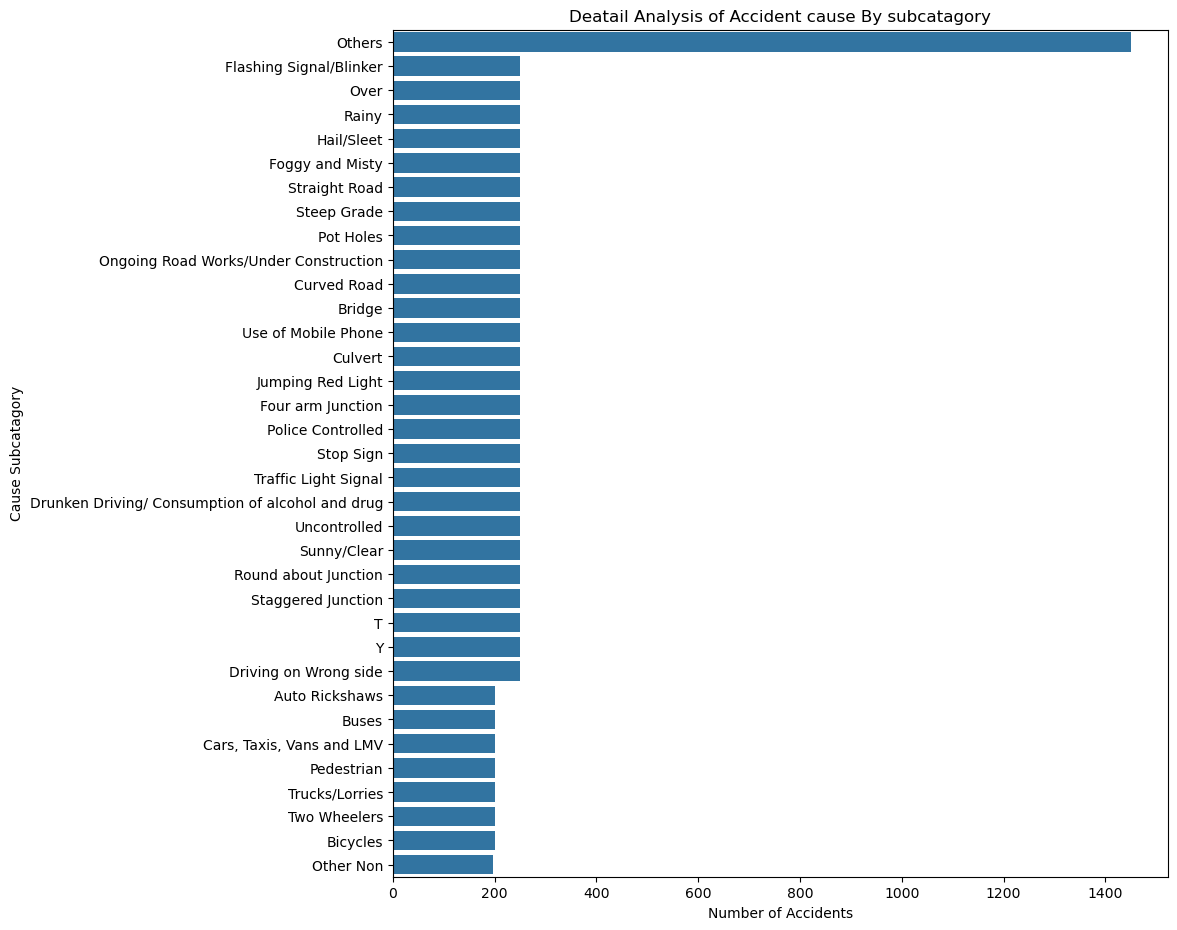

In [13]:
plt.figure(figsize=(10,11))
sns.countplot(y="Cause_Subcategory",data=pf_clean,order=pf_clean["Cause_Subcategory"].value_counts().index)
plt.title("Deatail Analysis of Accident cause By subcatagory")
plt.xlabel("Number of Accidents")
plt.ylabel("Cause Subcatagory")
plt.show()

Due to other reson maximum accident accure.

The Outcomes of the incident:

In [14]:
pf_clean["Outcome_of_Incident"].value_counts()

Outcome_of_Incident
Total number of Accidents    2000
Greviously Injured           1999
Minor Injury                 1999
Persons Killed               1999
Total Injured                1550
Name: count, dtype: int64

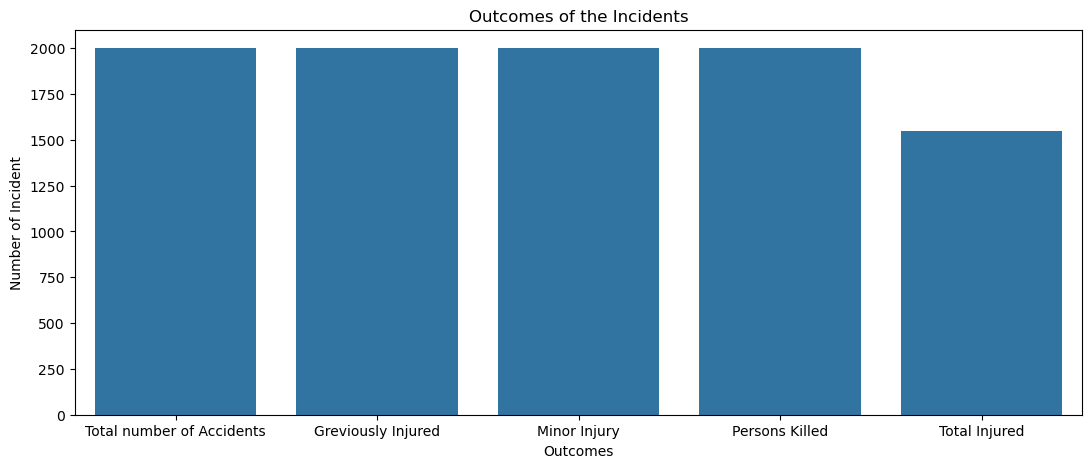

In [15]:
plt.figure(figsize=(13,5))
sns.countplot(x="Outcome_of_Incident",data=pf_clean,order=pf_clean["Outcome_of_Incident"].value_counts().index)
plt.title("Outcomes of the Incidents")
plt.xlabel("Outcomes")
plt.ylabel("Number of Incident")
plt.show()

Analyzing Accident Causes vs Outcomes:

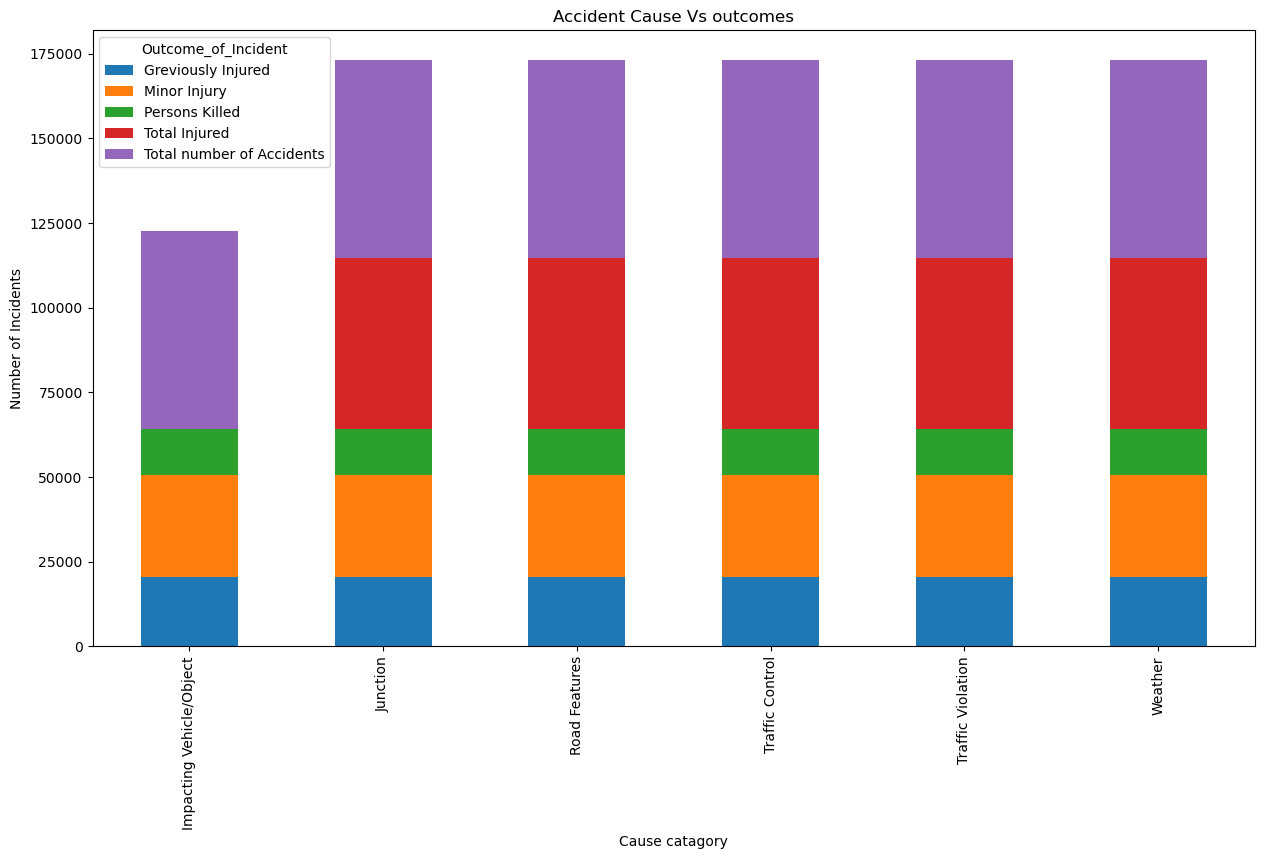

In [16]:
outcome_Vs_cause = pf_clean.groupby(["Cause_category","Outcome_of_Incident"])["Count"].sum().unstack()

outcome_Vs_cause.plot(kind="bar",stacked=True,figsize=(15,8))
plt.title("Accident Cause Vs outcomes")
plt.xlabel("Cause catagory")
plt.ylabel("Number of Incidents")
plt.show()